<a href="https://colab.research.google.com/github/JishnuJayaraj/ML/blob/master/creating_1st_NN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Verify that Tensorflow is working
import tensorflow as tf
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

# print version
print("Tensorflow version is " + str(tf.__version__))

# verify session works
hello = tf.constant('Hello from Tensorflow')
sess = tf.Session()
print(sess.run(hello))

In [0]:
#   keras-check.py
#   Verify that Keras can interact with the backend

import numpy as np
from keras import backend as kbe

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

# Test Keras - backend interaction
data = kbe.variable(np.random.random((4,2)))   # create 4 X 2 tensor of random numbers 
zero_data = kbe.zeros_like(data)               # create 4 X 2 tensor of zeros
print(kbe.eval(zero_data))                     # evaluate the zero_data and print out the results

**A sample blob code snippet**

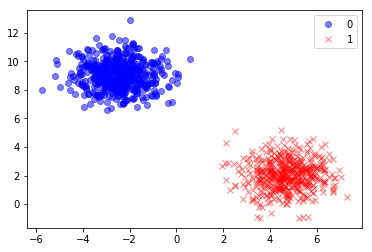

W0621 11:12:56.813170 140185927669632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 11:12:56.825727 140185927669632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
700/700 [==============================] - 1s 723us/step - loss: 0.0118 - acc: 1.0000
Epoch 2/100
700/700 [==============================] - 0s 41us/step - loss: 0.0015 - acc: 1.0000
Epoch 3/100
700/700 [==============================] - 0s 38us/step - loss: 8.7360e-04 - acc: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 39us/step - loss: 6.3281e-04 - acc: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 38us/step - loss: 5.2035e-04 - acc: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 39us/step - loss: 4.4080e-04 - acc: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 44us/step - loss: 3.8836e-04 - acc: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 41us/step - loss: 3.4388e-04 - acc: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 41us/step - loss: 3.0946e-04 - acc: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 45us/step - loss: 2.7625e-04 - acc: 1.0

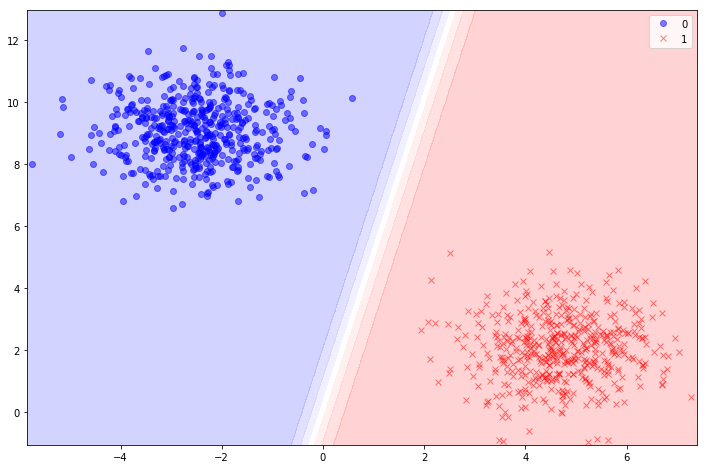

In [0]:
#   simple-blobs.py
#   Defines a network that can find separate data from two blobs of data from 
#   different classes
#

#   Imports
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

# Helper functions

#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt


# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from keras.models import Sequential
from keras.layers import Dense         # each neuron connected to each
from keras.optimizers import Adam      # for back prop

# create model - add layer - compile model - train model - evaluate perf

#   Simple Sequential model
model = Sequential()
#   Add a Dense Fully Connected Layer with 1 neuron.  Using input_shape = (2,) says the input will 
#       be arrays of the form (*,2).  The first dimension will be an unspecified 
#       number of batches (rows) of data.  The second dimension is 2 which are the X, Y positions of each data element.
#       The sigmoid activation function is used to return 0 or 1, signifying the data 
#       cluster the position is predicted to belong to.
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1)
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()